In [42]:
#https://drive.google.com/file/d/1BUgG1Wp6oCkP4-_NmQCV12Ok7zxFaJmy/view?usp=sharing
!gdown '1BUgG1Wp6oCkP4-_NmQCV12Ok7zxFaJmy'

Downloading...
From (original): https://drive.google.com/uc?id=1BUgG1Wp6oCkP4-_NmQCV12Ok7zxFaJmy
From (redirected): https://drive.google.com/uc?id=1BUgG1Wp6oCkP4-_NmQCV12Ok7zxFaJmy&confirm=t&uuid=e29a9b43-2969-4aad-af56-0e6515d3f3dd
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 85.1MB/s]


# ***8.1. Card Fraud Detection - Softmax Regression***

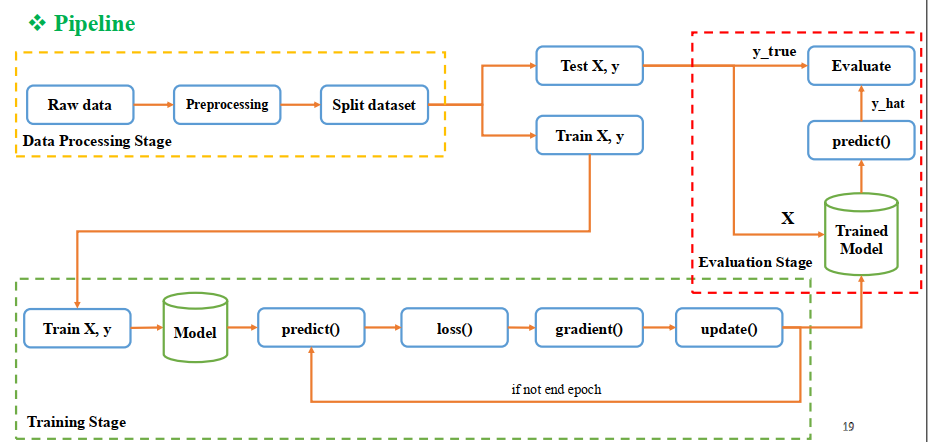

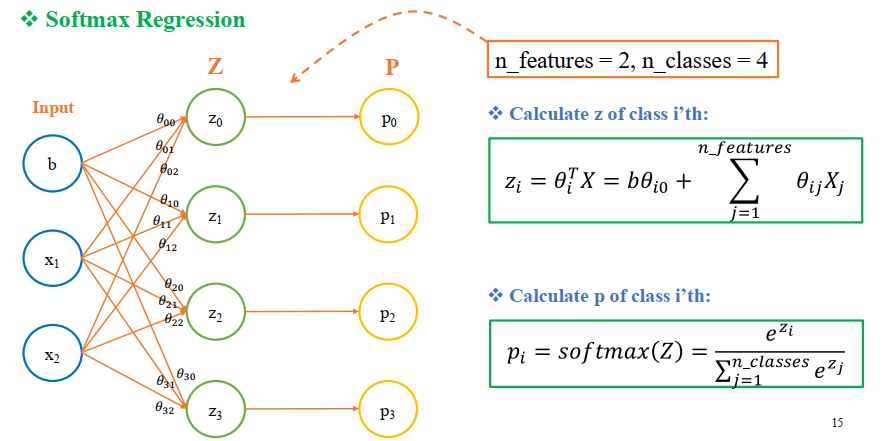

In [43]:
import pandas as pd

# 1. Load and prepare data
DATASET_PATH = '/content/creditcard.csv'
df = pd.read_csv(DATASET_PATH)
dataset_arr = df.to_numpy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [44]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Split data into features (X) and labels (y)
def split_features_labels(df: pd.DataFrame) -> tuple:
    """
    Tách DataFrame thành biến đầu vào X và nhãn y.
    Input:  df: pd.DataFrame - DataFrame chứa dữ liệu.
    Output:
        X: np.ndarray - Mảng chứa các đặc trưng, với shape (n_samples, n_features).
        y: np.ndarray - Mảng chứa nhãn, với shape (n_samples,).

    Example:
        >>> X, y = split_features_labels(df)      >>> X.shape, y.shape
    """
    dataset_arr = df.to_numpy()
    X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:,-1].astype(np.uint8)
    return X, y

dataset_arr = df.to_numpy()
y_class, count_class = np.unique(dataset_arr[:,-1].astype(np.uint8), return_counts=True)

X, y = split_features_labels(df)
y_class, count_class,  X, y[50:500-1000]

(array([0, 1], dtype=uint8),
 array([284315,    492]),
 array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
          1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
        [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
        [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
         -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
        ...,
        [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
          4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
        [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
          1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
        [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

# ***Add bias to X***

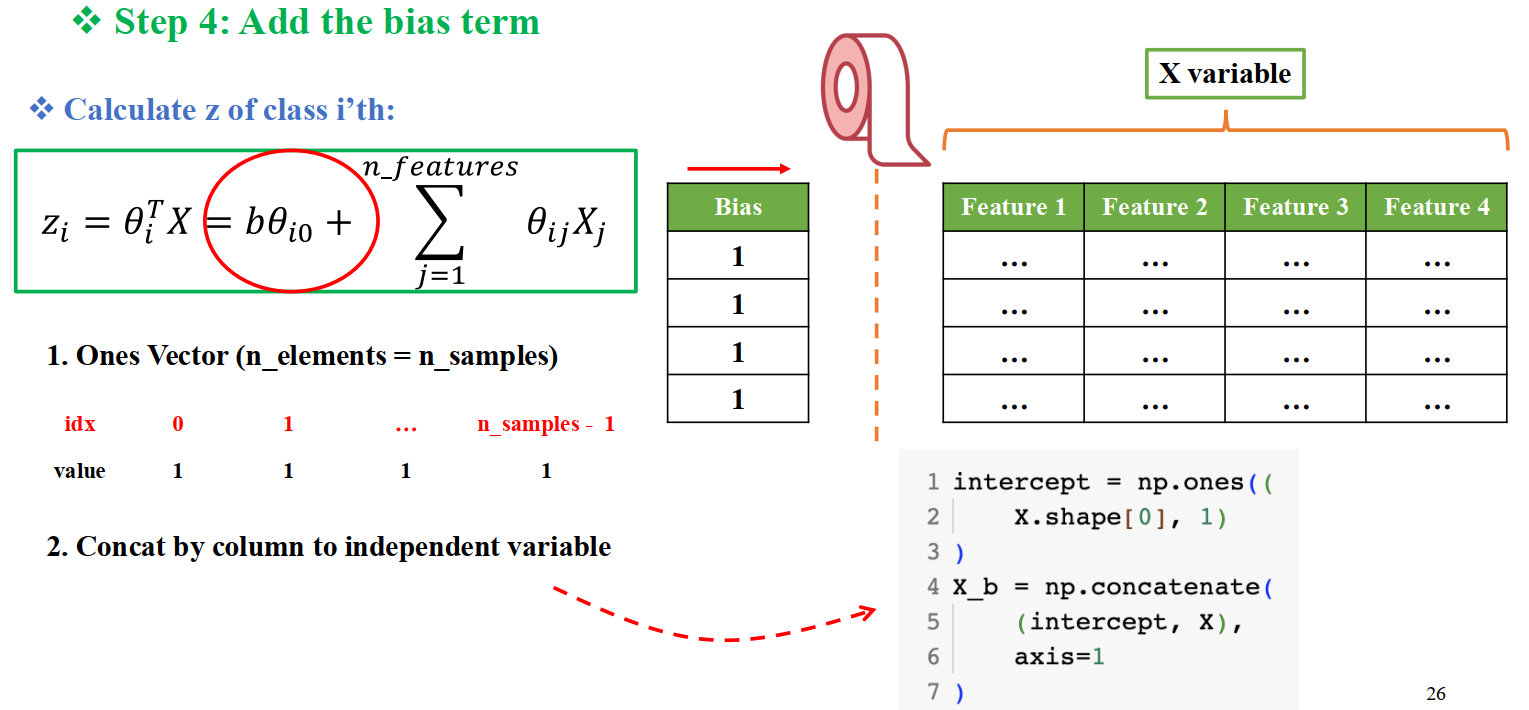

In [45]:
# Step 2: Add bias to features
def add_bias(X: np.ndarray) -> np.ndarray:
    """
    Thêm cột bias vào mảng đặc trưng X.
    Input:
        X: np.ndarray - Mảng chứa các đặc trưng ban đầu, với shape (n_samples, n_features).
    Output:
        X_b: np.ndarray - Mảng đặc trưng với cột bias, với shape (n_samples, n_features + 1).

    Example:
        >>> X_b = add_bias(X)
        >>> X_b[0]  # bias (1.0) được thêm vào cột đầu tiên
    """
    n_samples = X.shape[0]
    intercept = np.ones((n_samples, 1)) # cột hằng, "hằng số chặn"
    X_b = np.concatenate((intercept, X), axis=1)
    return X_b

X_b = add_bias(X)
X_b[:2]



array([[ 1.00000000e+00,  0.00000000e+00, -1.35980713e+00,
        -7.27811733e-02,  2.53634674e+00,  1.37815522e+00,
        -3.38320770e-01,  4.62387778e-01,  2.39598554e-01,
         9.86979013e-02,  3.63786970e-01,  9.07941720e-02,
        -5.51599533e-01, -6.17800856e-01, -9.91389847e-01,
        -3.11169354e-01,  1.46817697e+00, -4.70400525e-01,
         2.07971242e-01,  2.57905802e-02,  4.03992960e-01,
         2.51412098e-01, -1.83067779e-02,  2.77837576e-01,
        -1.10473910e-01,  6.69280749e-02,  1.28539358e-01,
        -1.89114844e-01,  1.33558377e-01, -2.10530535e-02,
         1.49620000e+02],
       [ 1.00000000e+00,  0.00000000e+00,  1.19185711e+00,
         2.66150712e-01,  1.66480113e-01,  4.48154078e-01,
         6.00176493e-02, -8.23608088e-02, -7.88029833e-02,
         8.51016549e-02, -2.55425128e-01, -1.66974414e-01,
         1.61272666e+00,  1.06523531e+00,  4.89095016e-01,
        -1.43772296e-01,  6.35558093e-01,  4.63917041e-01,
        -1.14804663e-01, -1.83

In [46]:
# Step 3: One-hot encode labels
def one_hot_encode_labels(y: np.ndarray) -> np.ndarray:
    """
    Chuyển đổi nhãn thành vector one-hot.
    Input:
        y: np.ndarray - Nhãn ở dạng số nguyên, với shape (n_samples,).
    Output:
        y_encoded: np.ndarray - Nhãn one-hot encoded, với shape (n_samples, n_classes).

    Example:
        >>> y_encoded = one_hot_encode_labels(y)
        >>> y_encoded[0]  # Ví dụ: [1, 0] nếu y[0] = 0 cho nhãn lớp đầu tiên
    """
    n_classes = np.unique(y, axis=0).shape[0]
    n_samples = y.shape[0]
    y_encoded = np.zeros((n_samples, n_classes))
    y_encoded[np.arange(n_samples), y] = 1
    return y_encoded

y_encoded = one_hot_encode_labels(y)
y_encoded[:2]

array([[1., 0.],
       [1., 0.]])

In [116]:
# Step 4: Split data into training, validation, and test

import numpy as np
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True # xáo trộn dữ liệu khi phân chia không (nếu xáo trộn sẽ không phù hợp Times series)

# Split data into training, validation, and test sets using only numpy
def split_data_numpy(X, y, val_size=val_size, test_size=test_size, random_state=2, is_shuffle= is_shuffle):
    """
    Split data into training, validation, and test sets using only numpy.

    Parameters:
    - X: Features dataset as a numpy array.
    - y: Target labels as a numpy array.
    - val_size: Proportion of the dataset to use as the validation set.
    - test_size: Proportion of the training set (after validation split) to use as the test set.
    - random_state: Seed for random number generator to ensure reproducibility.
    - is_shuffle: Boolean to determine if data should be shuffled before splitting.

    Returns:
    - X_train: Features for the training set.
    - X_val: Features for the validation set.
    - X_test: Features for the test set.
    - y_train: Labels for the training set.
    - y_val: Labels for the validation set.
    - y_test: Labels for the test set.
    """

    # Set the random seed for reproducibility
    if is_shuffle: # Nếu input yêu cầu xáo trộn các hàng trong dữ liệu
        np.random.seed(random_state) # đảm bảo rằng các giá trị ngẫu nhiên được tạo ra sẽ giống nhau trong mỗi lần chạy nếu "seed" giống nhau.
        indices = np.random.permutation(X.shape[0]) # tạo ra một list = [xáo trộn từ 0 -> số <X.shape[0]]
        X, y = X[indices], y[indices]

    # Calculate sizes for each split
    total_samples = X.shape[0]
    val_count = int(total_samples * val_size)
    train_count = total_samples - val_count
    test_count = int(train_count * test_size)
    final_train_count = train_count - test_count

    # Split the data
    X_val, y_val = X[:val_count], y[:val_count]
    X_train, y_train = X[val_count:val_count + final_train_count], y[val_count:val_count + final_train_count]
    X_test, y_test = X[val_count + final_train_count:], y[val_count + final_train_count:]

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_data_numpy(X_b, y_encoded)
# Output the sizes of each split
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

Number of training samples: 199366
Number of val samples: 56961
Number of test samples: 28480


In [48]:
from sklearn.model_selection import train_test_split

val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

def split_data(X, y, val_size=val_size, test_size=test_size, random_state=2, is_shuffle= is_shuffle):
    """
    Split data into training, validation, and test sets.

    Parameters:
    - X: Features dataset.
    - y: Target labels.
    - val_size: Proportion of the dataset to use as the validation set.
    - test_size: Proportion of the training set (after validation split) to use as the test set.
    - random_state: Seed for random number generator to ensure reproducibility.
    - is_shuffle: Boolean to determine if data should be shuffled before splitting.

    Returns:
    - X_train: Features for the training set.
    - X_val: Features for the validation set.
    - X_test: Features for the test set.
    - y_train: Labels for the training set.
    - y_val: Labels for the validation set.
    - y_test: Labels for the test set.
    """

    # Step 1: Split original data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=val_size, random_state=random_state, shuffle=is_shuffle
    )

    # Step 2: Further split training data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_data_numpy(X_b, y_encoded)

# Output the sizes of each split
print(f'Number of training samples: {X_train.shape[0]}')
print(f'Number of val samples: {X_val.shape[0]}')
print(f'Number of test samples: {X_test.shape[0]}')

print(f'y_train_encoded shape: {y_train.shape}')
print(f'y_val_encoded shape: {y_val.shape}')
print(f'y_test_encoded shape: {y_test.shape}')

print(f'y_train_encoded:\n {y_train[:3]}')
print(f'X_train:\n {X_train[:3]}')

Number of training samples: 199366
Number of val samples: 56961
Number of test samples: 28480
y_train_encoded shape: (199366, 2)
y_val_encoded shape: (56961, 2)
y_test_encoded shape: (28480, 2)
y_train_encoded:
 [[1. 0.]
 [1. 0.]
 [1. 0.]]
X_train:
 [[ 1.00000000e+00  1.18117000e+05  1.46612670e-01  1.23261732e+00
  -1.28123765e+00 -9.20073259e-02  9.62813135e-01 -4.49265024e-01
   3.61553182e-01 -1.86033169e+00  1.61722623e-01 -1.63970111e+00
  -8.73951755e-01 -4.48071145e-02  3.88727950e-01 -2.70913167e+00
  -6.91893602e-01  5.47099050e-01  1.80385260e+00  7.11076580e-01
  -4.49944386e-01 -3.54651853e-01  1.47183726e+00 -3.74323536e-01
  -3.77807033e-01 -8.46035997e-01  1.08343244e+00  8.29297247e-01
   2.14370150e-01  2.85213290e-01  2.95600000e+01]
 [ 1.00000000e+00  8.18270000e+04 -6.26901618e-01  1.17279004e+00
   1.75062348e+00  8.68049714e-01  1.54236668e-02 -7.71008661e-01
   1.01737052e+00 -5.33477638e-01 -4.24699580e-01  2.43930840e-01
   6.57331211e-02  3.43857602e-01  8.27

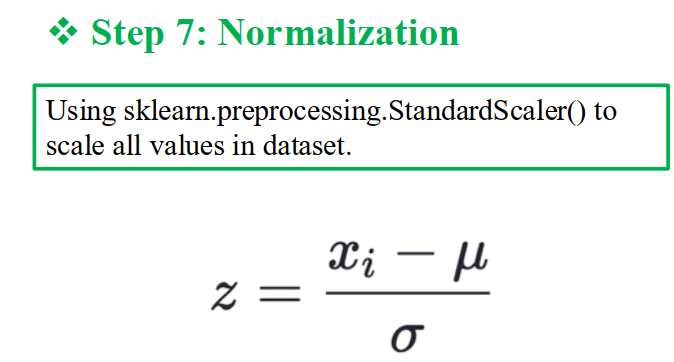

In [117]:
# Step 7: Normalize features (excluding bias column)
def normalize_data(X_train: np.ndarray, X_val: np.ndarray, X_test: np.ndarray) -> tuple:
    """
    Chuẩn hóa dữ liệu cho các đặc trưng, loại trừ cột bias.
    Input:
        X_train, X_val, X_test: np.ndarray - Các tập dữ liệu cần chuẩn hóa.
    Output:
        X_train_norm, X_val_norm, X_test_norm: np.ndarray - Các tập dữ liệu sau khi chuẩn hóa.

    Example:
        >>> X_train_norm, X_val_norm, X_test_norm = normalize_data(X_train, X_val, X_test)
    """
    scaler = StandardScaler()
    X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
    X_val[:, 1:] = scaler.transform(X_val[:, 1:])
    X_test[:, 1:] = scaler.transform(X_test[:, 1:])
    return X_train, X_val, X_test

X_train, X_val, X_test = normalize_data(X_train, X_val, X_test)
X_train, X_val, X_test

(array([[ 1.        ,  0.49133206,  0.07354179, ...,  0.52956538,
          0.86959496, -0.22939768],
        [ 1.        , -0.27347417, -0.32259   , ..., -0.92439646,
         -0.24661045, -0.26696738],
        [ 1.        , -1.12504554, -0.00464906, ..., -0.3874569 ,
          0.39745568,  2.60328698],
        ...,
        [ 1.        , -1.27379182,  0.49987832, ...,  0.13991425,
          0.11191704,  0.2748293 ],
        [ 1.        ,  1.33030067,  1.0122391 , ..., -0.17605032,
         -0.1931579 , -0.33767065],
        [ 1.        ,  0.55221729, -1.21794911, ...,  0.76205918,
          0.12067816,  0.8205125 ]]),
 array([[ 1.        ,  1.03976282, -0.2993185 , ..., -0.6277352 ,
         -0.38388387, -0.29511521],
        [ 1.        , -0.43065038,  0.35014622, ...,  0.05734388,
          0.24398548,  0.66108664],
        [ 1.        , -0.58369593, -0.43602099, ...,  0.53812417,
          0.38985575, -0.28090389],
        ...,
        [ 1.        , -0.91943933,  0.65370971, ...,  

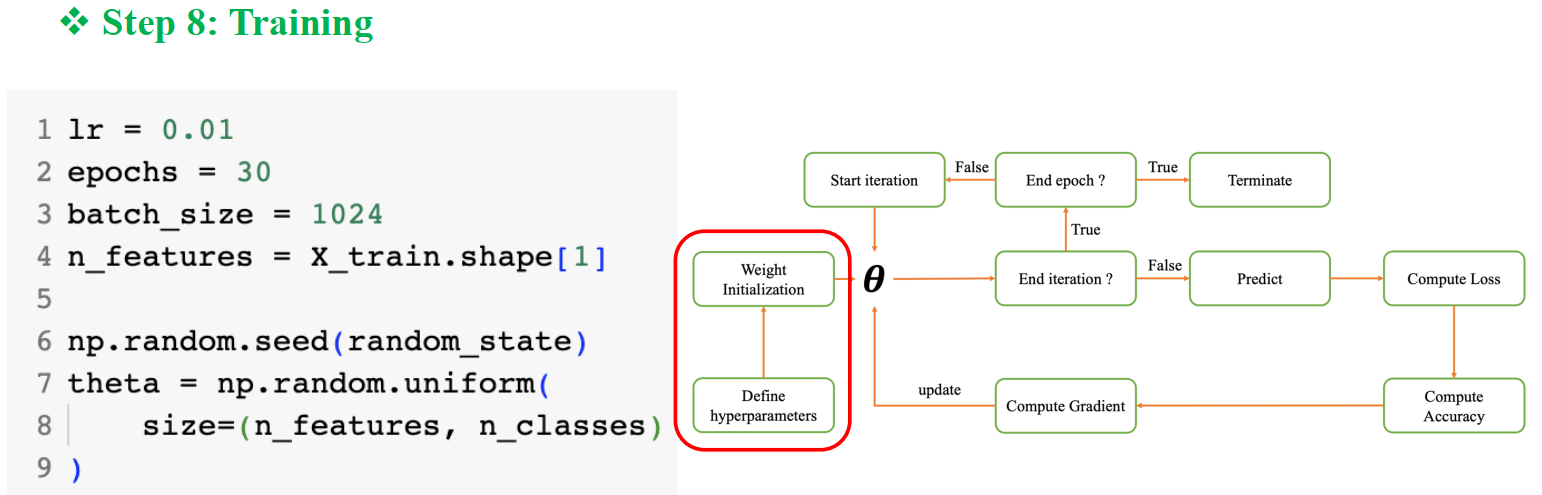

In [57]:
lr = 0.01
epochs = 30
batch_size = 1024
random_state = 2

n_features = X_train.shape[1]                   # X_train đã thêm bias -> 'n_features = n_features_gốc + 1'
n_classes = len(np.unique(y_train, axis= 0))

np.random.seed(random_state)
theta = np.random.uniform(size = (n_features, n_classes)) # theta.shape = (n_features_gốc + 1)*n_classes

theta.shape , theta

((31, 2),
 array([[0.4359949 , 0.02592623],
        [0.54966248, 0.43532239],
        [0.4203678 , 0.33033482],
        [0.20464863, 0.61927097],
        [0.29965467, 0.26682728],
        [0.62113383, 0.52914209],
        [0.13457995, 0.51357812],
        [0.18443987, 0.78533515],
        [0.85397529, 0.49423684],
        [0.84656149, 0.07964548],
        [0.50524609, 0.0652865 ],
        [0.42812233, 0.09653092],
        [0.12715997, 0.59674531],
        [0.226012  , 0.10694568],
        [0.22030621, 0.34982629],
        [0.46778748, 0.20174323],
        [0.64040673, 0.48306984],
        [0.50523672, 0.38689265],
        [0.79363745, 0.58000418],
        [0.1622986 , 0.70075235],
        [0.96455108, 0.50000836],
        [0.88952006, 0.34161365],
        [0.56714413, 0.42754596],
        [0.43674726, 0.77655918],
        [0.53560417, 0.95374223],
        [0.54420816, 0.08209492],
        [0.3663424 , 0.8508505 ],
        [0.40627504, 0.02720237],
        [0.24717724, 0.06714437],
    

(array([[ 14,  24,  34,  44],
        [ 24,  42,  60,  78],
        [ 39,  69,  99, 129],
        [ 40,  70, 100, 130],
        [ 36,  62,  88, 114]]),
 array([[1.20260428e+06, 2.64891221e+10, 5.83461743e+14, 1.28516001e+19],
        [2.64891221e+10, 1.73927494e+18, 1.14200739e+26, 7.49841700e+33],
        [8.65934004e+16, 9.25378173e+29, 9.88903032e+42, 1.05678871e+56],
        [2.35385267e+17, 2.51543867e+30, 2.68811714e+43, 2.87264955e+56],
        [4.31123155e+15, 8.43835667e+26, 1.65163625e+38, 3.23274119e+49]]),
 array([[9.35719813e-14, 2.06106005e-09, 4.53978686e-05, 9.99954600e-01],
        [3.53262852e-24, 2.31952279e-16, 1.52299795e-08, 9.99999985e-01],
        [8.19401262e-40, 8.75651076e-27, 9.35762297e-14, 1.00000000e+00],
        [8.19401262e-40, 8.75651076e-27, 9.35762297e-14, 1.00000000e+00],
        [1.33361482e-34, 2.61027907e-23, 5.10908903e-12, 1.00000000e+00]]))

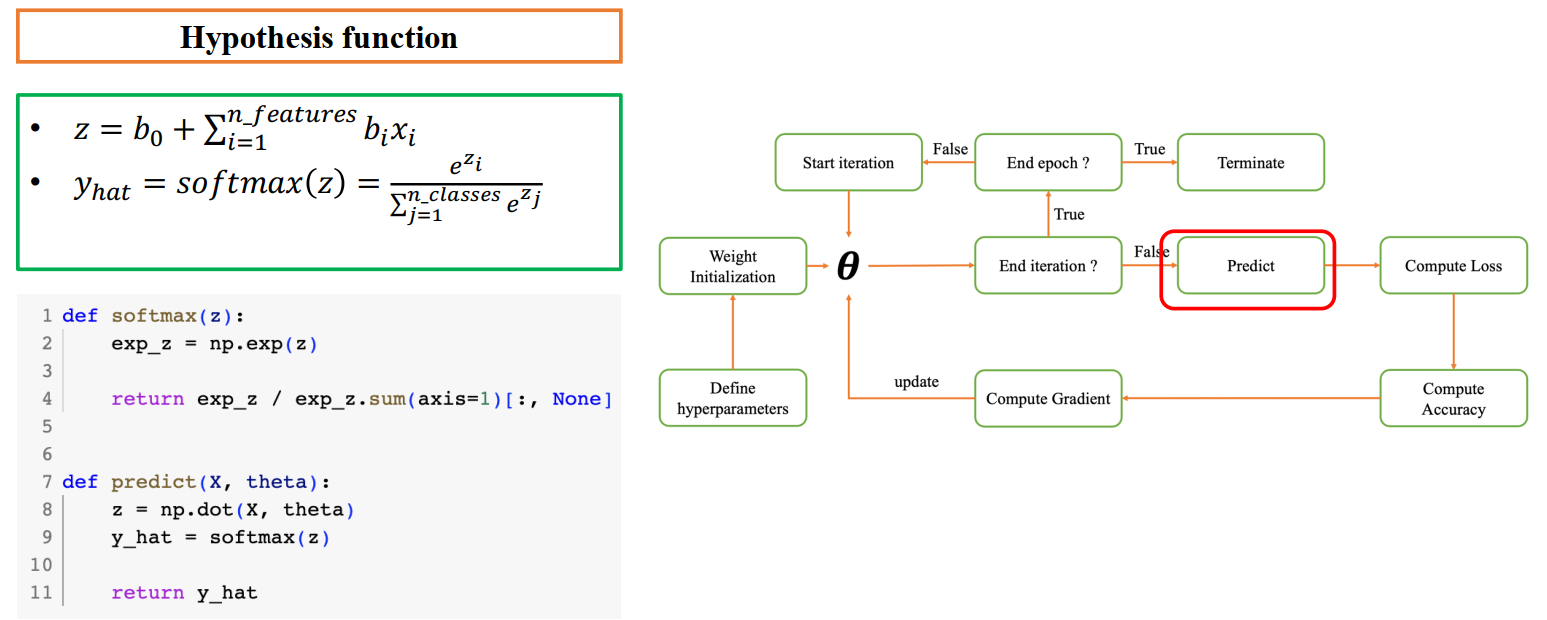

In [63]:
# Step 6: Softmax function
def softmax(z: np.ndarray) -> np.ndarray:
    """
    Tính hàm softmax, trả về xác suất dự đoán xảy ra của từng class, trên mỗi hàng của mảng z.
    Input:   z:             np.ndarray - Logits của từng lớp, với shape (n_samples, n_classes).
    Output:  softmax_probs: np.ndarray - Xác suất softmax cho từng lớp, với shape (n_samples, n_classes).
    """
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    softmax_probs = exp_z / exp_z.sum(axis=1, keepdims=True)
    return softmax_probs

z = np.dot(X_train, theta)

softmax_probs = softmax(z)
print(softmax_probs)

[[0.06618135 0.93381865]
 [0.66098846 0.33901154]
 [0.99548111 0.00451889]
 ...
 [0.06913514 0.93086486]
 [0.85233182 0.14766818]
 [0.93244345 0.06755655]]


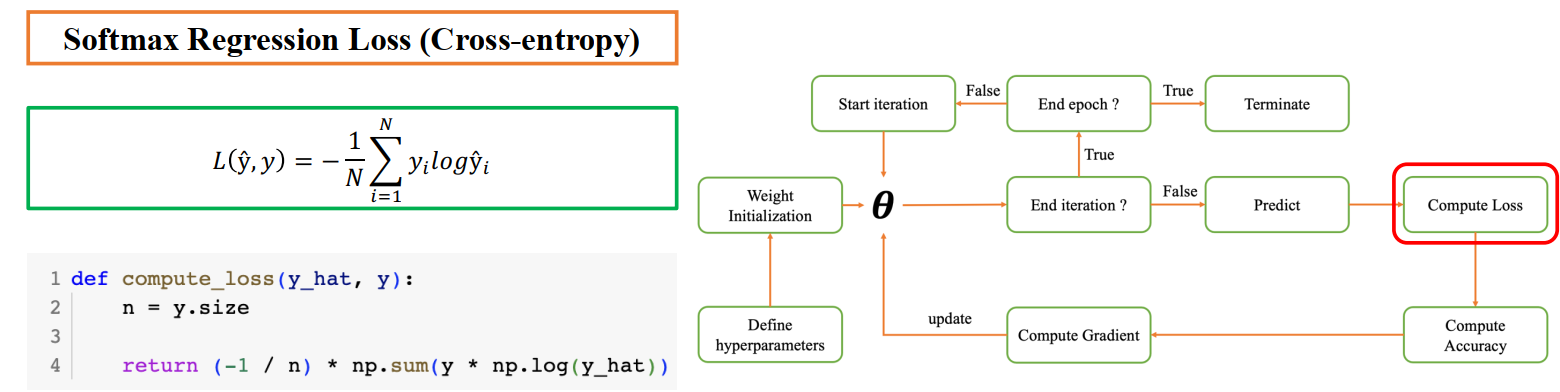

In [113]:
def compute_loss(y_hat, y):
    n = y.size # n = y.shape[0]
    return -np.sum(y * np.log(y_hat + 1e-9)) / n

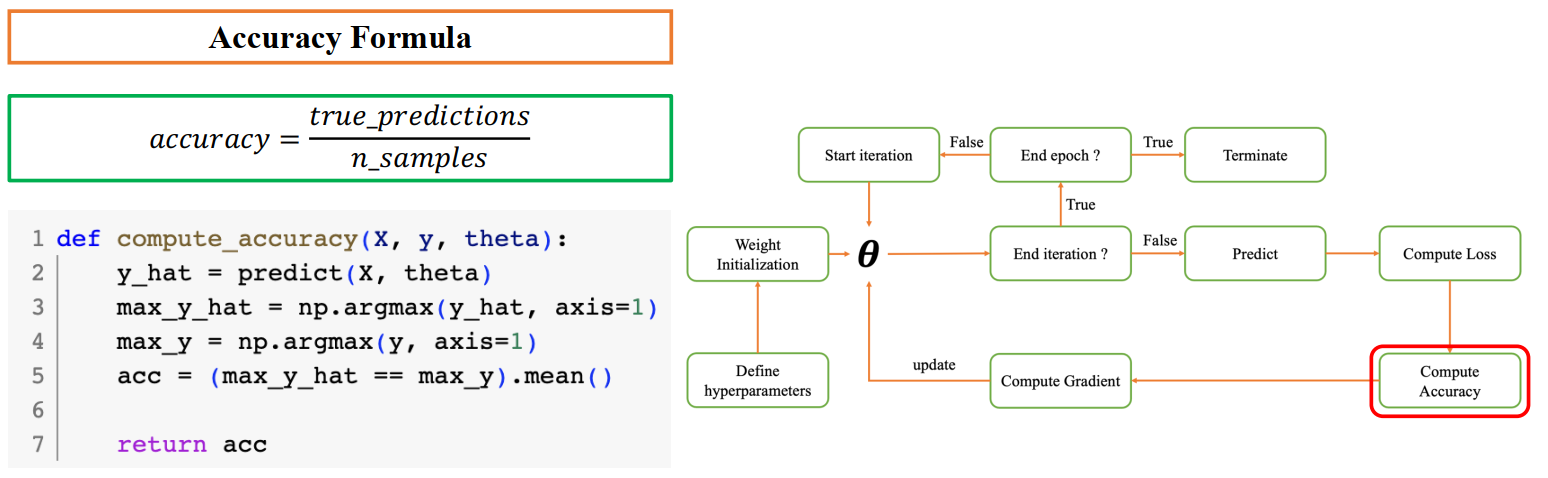

In [107]:
def compute_accuracy(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> float:
    """Tính độ chính xác của mô hình."""
    y_hat = softmax(np.dot(X, theta))

    # ví dụ: np.argmax([0.3, 0.4, 0.3]) =2  'bằng' np.argmax([0, 1, 0]) = 2 -> true
    #         np.argmax([0.3, 0.4, 0.3]) =2 'khác' np.argmax([0, 0, 1]) = 3 -> false
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc

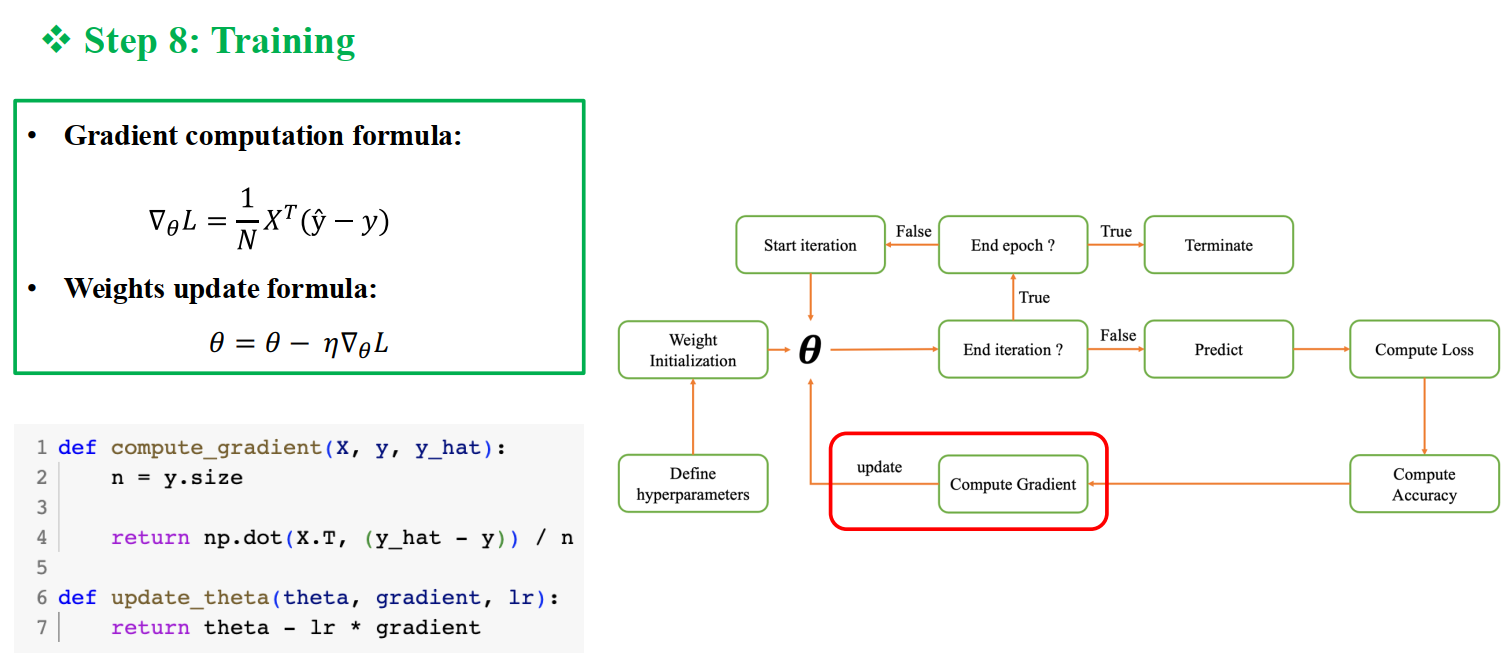

In [123]:
# Step 8: Compute Gradient
def compute_gradient(X: np.ndarray, y: np.ndarray, y_hat: np.ndarray) -> np.ndarray:
    """     Tính gradient của hàm mất mát với trọng số.     """
    n = y.shape[0]
    return np.dot(X.T, (y_hat - y)) / n

# Step 9: Update weights
def update_theta(theta: np.ndarray, gradient: np.ndarray, lr: float) -> np.ndarray:
    """     Cập nhật trọng số bằng Gradient Descent.     """
    return theta - lr * gradient

# Step 11: Training loop
def train_model(X_train: np.ndarray, y_train: np.ndarray, X_val: np.ndarray, y_val: np.ndarray,
                X_test: np.ndarray, y_test: np.ndarray,
                lr: float, epochs: int, batch_size: int) -> dict:
    """
    Huấn luyện mô hình bằng Gradient Descent.
    Input:
        X_train, y_train: np.ndarray - Tập dữ liệu train và nhãn one-hot.
        X_val, y_val: np.ndarray - Tập dữ liệu validation và nhãn one-hot.
        X_test, y_test: np.ndarray - Tập dữ liệu test và nhãn one-hot.
        lr: float - Learning rate.
        epochs: int - Số epoch.
        batch_size: int - Kích thước batch.
    Output:
        history: dict - Lịch sử loss và accuracy cho mỗi tập dữ liệu trong quá trình huấn luyện.

    Example:
        >>> history = train_model(X_train, y_train, X_val, y_val, X_test, y_test, lr=0.01, epochs=30, batch_size=128)
    """
    n_features, n_classes = X_train.shape[1], y_train.shape[1]
    theta = np.random.uniform(size=(n_features, n_classes))

    # Khởi tạo các danh sách để lưu lịch sử loss và accuracy
    history = {
        "train_loss": [],
        "val_loss": [],
        "test_loss": [],
        "train_acc": [],
        "val_acc": [],
        "test_acc": []
    }

    for epoch in range(epochs):
        train_batch_losses = []

        # Chia thành các batch
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]

            # Dự đoán và tính loss cho batch
            y_hat = softmax(np.dot(X_batch, theta))
            loss = compute_loss(y_hat, y_batch)
            train_batch_losses.append(loss)

            # Tính gradient và cập nhật theta
            gradient = compute_gradient(X_batch, y_batch, y_hat)
            theta = update_theta(theta, gradient, lr)

        # Tính loss trung bình cho epoch
        train_loss = np.mean(train_batch_losses)
        history["train_loss"].append(train_loss)

        # Tính accuracy trên tập train, validation, và test
        train_acc = compute_accuracy(X_train, y_train, theta)
        val_acc = compute_accuracy(X_val, y_val, theta)
        test_acc = compute_accuracy(X_test, y_test, theta)

        # Lưu vào lịch sử accuracy
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)
        history["test_acc"].append(test_acc)

        # Tính loss trên tập validation và test
        y_val_hat = softmax(np.dot(X_val, theta))
        val_loss = compute_loss(y_val_hat, y_val)
        y_test_hat = softmax(np.dot(X_test, theta))
        test_loss = compute_loss(y_test_hat, y_test)

        # Lưu vào lịch sử loss
        history["val_loss"].append(val_loss)
        history["test_loss"].append(test_loss)

        # Hiển thị thông tin huấn luyện mỗi epoch
        print(f'Epoch {epoch + 1}/{epochs}, '
              f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, '
              f'Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')

    return theta, history

# Gọi hàm train_model và lưu lại lịch sử huấn luyện
theta, history = train_model(X_train, y_train, X_val, y_val, X_test, y_test, lr=0.01, epochs=100, batch_size=32)

theta, history["train_loss"]

Epoch 1/100, Train Loss: 0.0253, Val Loss: 0.0053, Test Loss: 0.0056, Train Acc: 0.9991, Val Acc: 0.9993, Test Acc: 0.9990
Epoch 2/100, Train Loss: 0.0045, Val Loss: 0.0034, Test Loss: 0.0038, Train Acc: 0.9991, Val Acc: 0.9993, Test Acc: 0.9991
Epoch 3/100, Train Loss: 0.0034, Val Loss: 0.0027, Test Loss: 0.0032, Train Acc: 0.9991, Val Acc: 0.9993, Test Acc: 0.9991
Epoch 4/100, Train Loss: 0.0030, Val Loss: 0.0024, Test Loss: 0.0029, Train Acc: 0.9991, Val Acc: 0.9993, Test Acc: 0.9991
Epoch 5/100, Train Loss: 0.0027, Val Loss: 0.0023, Test Loss: 0.0027, Train Acc: 0.9992, Val Acc: 0.9993, Test Acc: 0.9990
Epoch 6/100, Train Loss: 0.0026, Val Loss: 0.0021, Test Loss: 0.0026, Train Acc: 0.9992, Val Acc: 0.9993, Test Acc: 0.9990
Epoch 7/100, Train Loss: 0.0025, Val Loss: 0.0021, Test Loss: 0.0025, Train Acc: 0.9992, Val Acc: 0.9993, Test Acc: 0.9990
Epoch 8/100, Train Loss: 0.0024, Val Loss: 0.0020, Test Loss: 0.0025, Train Acc: 0.9992, Val Acc: 0.9993, Test Acc: 0.9990
Epoch 9/100, Tra

(array([[ 4.88054681, -3.49192865],
        [ 0.4667193 ,  0.31051076],
        [ 0.11829463,  0.30006045],
        [ 0.51153377,  0.5653077 ],
        [ 0.3211237 ,  0.38833002],
        [ 0.11280402,  0.91005665],
        [ 0.11191482,  0.31583487],
        [ 0.51917044,  0.39718334],
        [ 0.53981587,  0.34441611],
        [ 0.54367423,  0.35531569],
        [ 0.65807637,  0.37887496],
        [ 0.97236681,  0.10248604],
        [ 0.42363426,  0.43139526],
        [ 0.41928608,  0.42822253],
        [ 0.66916041,  0.34289428],
        [ 0.72442908,  0.15815099],
        [ 0.31846027,  0.21569885],
        [ 0.56055536,  0.40040806],
        [ 0.48135748,  0.48507938],
        [ 0.50637656,  0.48363545],
        [ 0.55478094,  0.69828963],
        [ 0.90980323,  0.58563054],
        [ 0.19637338,  0.44096006],
        [ 0.16291985,  0.53443579],
        [ 0.4236166 ,  0.37768109],
        [ 0.62139605,  0.68923496],
        [ 0.62636341,  0.59982113],
        [ 0.33070116,  0.334

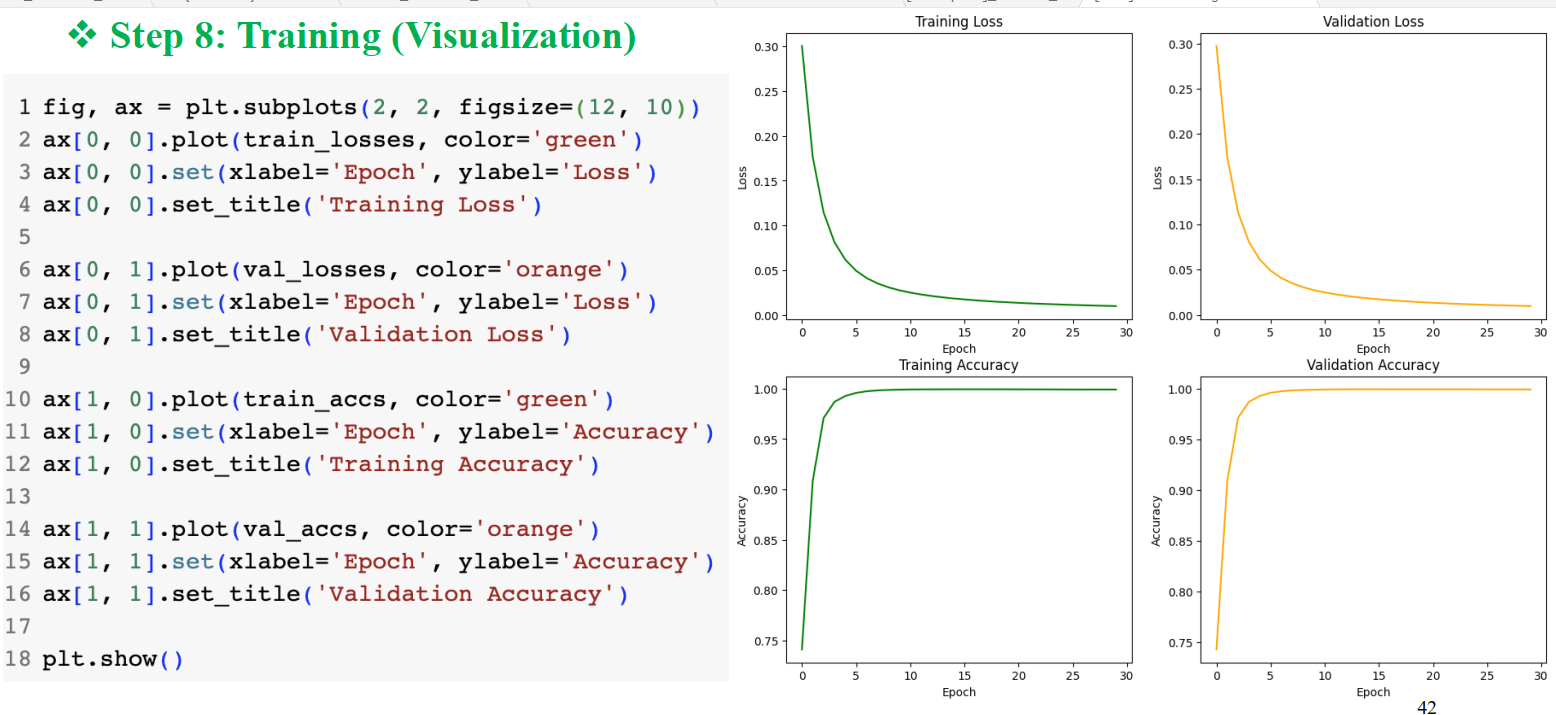

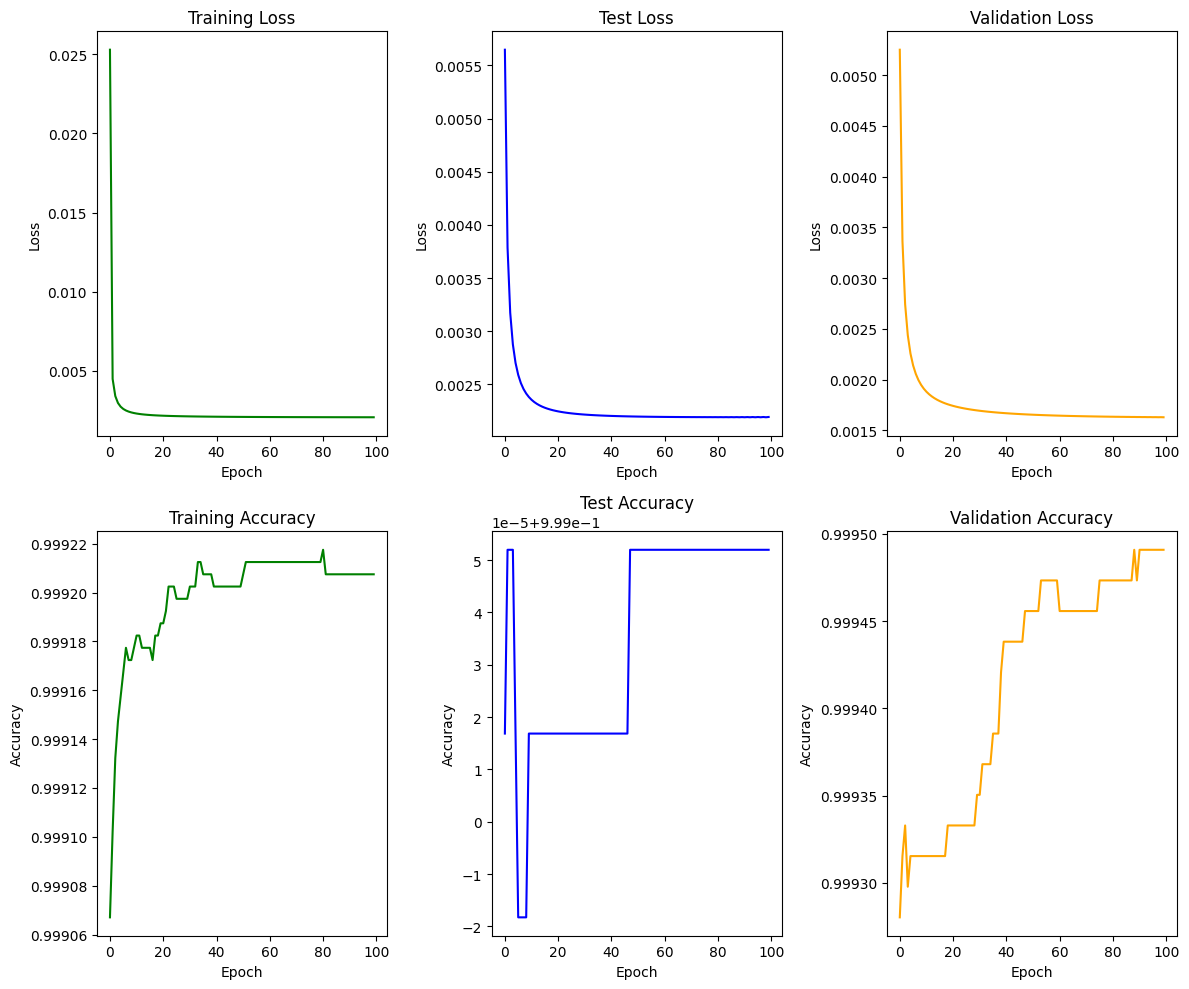

In [125]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, ax = plt.subplots(2, 3, figsize=(12, 10))

    # Training Loss
    ax[0, 0].plot(history['train_loss'], color='green')
    ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
    ax[0, 0].set_title('Training Loss')

    # Test Loss
    ax[0, 1].plot(history['test_loss'], color='blue')
    ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
    ax[0, 1].set_title('Test Loss')


    # Validation Loss
    ax[0, 2].plot(history['val_loss'], color='orange')
    ax[0, 2].set(xlabel='Epoch', ylabel='Loss')
    ax[0, 2].set_title('Validation Loss')

    # Training Accuracy
    ax[1, 0].plot(history['train_acc'], color='green')
    ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
    ax[1, 0].set_title('Training Accuracy')

    # Validation Accuracy
    ax[1, 1].plot(history['test_acc'], color='blue')
    ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
    ax[1, 1].set_title('Test Accuracy')

    # Validation Accuracy
    ax[1, 2].plot(history['val_acc'], color='orange')
    ax[1, 2].set(xlabel='Epoch', ylabel='Accuracy')
    ax[1, 2].set_title('Validation Accuracy')

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# ***-----PHẦN KIỂM TRA HỌC CODE MỚI --------***

In [124]:
# n số sample cũng là số dòng của dữ liệu X
x_bias = np.array([ [1, 2, 3],  # x_bias.shape = n×m = 5×3 , gồm 4 mẫu dữ liệu × (1 bias + 2 feature)
                    [1, 4, 5],
                    [1, 7, 8],
                    [1, 6, 9],
                    [1, 4, 9]])

y_thu = np.array([[1, 0, 0, 0],  # -> y_onehot.shape = n×k = 5×4  (k = 4 class one_hot)
                    [1, 0, 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1],
                    [0, 1, 0, 0]])

# Khởi tạo theta, với kích thước:  m × k  = 3 × 4
#     (x_bias.shape = n×m)  *  (theta = m × k) = (y_onehot = n×k )

# theta = np.array([
#     [bias_class1,    bias_class2,                  bias_class3,           bias_class4],           # Bias cho các lớp 1, 2, 3, 4
#     [weightfeature1_class1, weightfeature1_class2, weightfeature1_class3, weightfeature1_class4],  # Trọng số cho feature 1 với các lớp 1, 2, 3
#     [weightfeature2_class1, weightfeature2_class2, weightfeature2_class3, weightfeature2_class4]   # Trọng số cho feature 2 với các lớp 1, 2, 3
# ])
theta_test = np.array([[1, 1, 1, 1],
                      [2, 4 , 6, 8],
                      [3, 5, 7, 9]])

z = np.dot(x_bias, theta_test)
exp_z = np.exp(z)
y_hat = exp_z/exp_z.sum(axis=1)[:, None]

z, exp_z, y_hat
# y_test.shape, np.unique(y_test), n_features_test, n_classes_test, theta_test

(array([[ 14,  24,  34,  44],
        [ 24,  42,  60,  78],
        [ 39,  69,  99, 129],
        [ 40,  70, 100, 130],
        [ 36,  62,  88, 114]]),
 array([[1.20260428e+06, 2.64891221e+10, 5.83461743e+14, 1.28516001e+19],
        [2.64891221e+10, 1.73927494e+18, 1.14200739e+26, 7.49841700e+33],
        [8.65934004e+16, 9.25378173e+29, 9.88903032e+42, 1.05678871e+56],
        [2.35385267e+17, 2.51543867e+30, 2.68811714e+43, 2.87264955e+56],
        [4.31123155e+15, 8.43835667e+26, 1.65163625e+38, 3.23274119e+49]]),
 array([[9.35719813e-14, 2.06106005e-09, 4.53978686e-05, 9.99954600e-01],
        [3.53262852e-24, 2.31952279e-16, 1.52299795e-08, 9.99999985e-01],
        [8.19401262e-40, 8.75651076e-27, 9.35762297e-14, 1.00000000e+00],
        [8.19401262e-40, 8.75651076e-27, 9.35762297e-14, 1.00000000e+00],
        [1.33361482e-34, 2.61027907e-23, 5.10908903e-12, 1.00000000e+00]]))

In [82]:
# theta_test
n_features_test = x_bias.shape[1]  # m = 1 bias + 2 feature = 3
n_classes_test = len(np.unique(y_test, axis=0)) # # axis nếu không nó sẽ đi đến từng phần của  #len(np.unique(y_test)) #
np.random.seed(random_state)
theta_test = np.random.uniform(size = (n_features_test, n_classes_test))

theta_test.shape, theta_test

((3, 4),
 array([[0.4359949 , 0.02592623, 0.54966248, 0.43532239],
        [0.4203678 , 0.33033482, 0.20464863, 0.61927097],
        [0.29965467, 0.26682728, 0.62113383, 0.52914209]]))

In [105]:
import numpy as np
exp_z = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9],
                  [10, 11, 12],
                  [13, 14, 15]])

# Sử dụng keepdims=True
sum_with_keepdims = exp_z.sum(axis=1, keepdims=True) # Nếu không có keepdims nó tự động đẩy về mảng ngang
y_hat_none_error = exp_z / exp_z.sum(axis=1, keepdims=True) # không lỗi vì tương thích kích thước
print("Tổng với keepdims=True: \n" , sum_with_keepdims.shape, "\n" , sum_with_keepdims )
print("Tổng với not keepdims=True: \n", exp_z.sum(axis=1).shape,  "\n" , exp_z.sum(axis=1))
print("Tổng với keepdims=True check: \n", sum_with_keepdims.shape, exp_z.shape, y_hat_none_error)

# Sử dụng [:, None]
sum_with_none = exp_z.sum(axis=1)[:, None]  # change shape hơi kì
y_hat_none_error = exp_z / exp_z.sum(axis=1)[:, None] # không lỗi vì tương thích kích thước
print("Tổng với [:, None]:")
print(sum_with_none.shape, exp_z.shape, y_hat_none_error)

# khong Sử dụng [:, None], hoặc keepdims
sum_with_none_keepdims = exp_z.sum(axis=1)
print("Tổng với [:, None]:")
print(sum_with_none_keepdims)

print("Lỗi shape")
print(sum_with_none_keepdims.shape, exp_z.shape, sum_with_none_keepdims)
# y_hat_error = exp_z / exp_z.sum(axis=1) # Gây lỗi vì không tương thích kích thước


Tổng với keepdims=True: 
 (5, 1) 
 [[ 6]
 [15]
 [24]
 [33]
 [42]]
Tổng với not keepdims=True: 
 (5,) 
 [ 6 15 24 33 42]
Tổng với keepdims=True check: 
 (5, 1) (5, 3) [[0.16666667 0.33333333 0.5       ]
 [0.26666667 0.33333333 0.4       ]
 [0.29166667 0.33333333 0.375     ]
 [0.3030303  0.33333333 0.36363636]
 [0.30952381 0.33333333 0.35714286]]
Tổng với [:, None]:
(5, 1) (5, 3) [[0.16666667 0.33333333 0.5       ]
 [0.26666667 0.33333333 0.4       ]
 [0.29166667 0.33333333 0.375     ]
 [0.3030303  0.33333333 0.36363636]
 [0.30952381 0.33333333 0.35714286]]
Tổng với [:, None]:
[ 6 15 24 33 42]
Lỗi shape
(5,) (5, 3) [ 6 15 24 33 42]


In [99]:
# Ma trận 5 x 3
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
    [13, 14, 15]
])

# Vector có kích thước (5,)
vector = np.array([1, 2, 3, 4, 5])
print(vector[:, None])

# Biến vector thành dạng (5, 1) để nhân hamudar từng hàng
result = matrix * vector[:, None]
print("Kết quả của nhân từng hàng:")
print(result)

[[1]
 [2]
 [3]
 [4]
 [5]]
Kết quả của nhân từng hàng:
[[ 1  2  3]
 [ 8 10 12]
 [21 24 27]
 [40 44 48]
 [65 70 75]]


In [106]:
# Nhãn thực tế y (one-hot encoding)
y = np.array([
    [1, 0, 0],  # Lớp 0
    [0, 1, 0],  # Lớp 1
    [0, 0, 1]   # Lớp 2
])

# Xác suất dự đoán y_hat từ mô hình
y_hat = np.array([
    [0.7, 0.2, 0.1],  # Lớp dự đoán: 0
    [0.3, 0.4, 0.3],  # Lớp dự đoán: 1
    [0.2, 0.3, 0.5]   # Lớp dự đoán: 2
])

# Chuyển từ one-hot thành nhãn với np.argmax
true_labels = np.argmax(y, axis=1)       # Kết quả: [0, 1, 2]
predicted_labels = np.argmax(y_hat, axis=1)  # Kết quả: [0, 1, 2]

# Tính độ chính xác
acc = (predicted_labels == true_labels).mean()
print("Độ chính xác:", acc)  # Kết quả: 1.0 (100%)


Độ chính xác: 1.0


In [128]:
z = np.array([-1, -2, 3, 2])
exp_z = np.exp(z)
y_hat = exp_z/exp_z.sum() # (axis=1)[:, None]
y_hat

array([0.01314897, 0.00483724, 0.71790961, 0.26410418])